## GETTING DATASETS

In [1]:
import cv2
import os
from tqdm import tqdm

In [2]:
os.chdir(r'C:\Users\ADMIN\OneDrive - Hanoi University of Science and Technology\Desktop\jupyter\yes')

In [3]:
X = []
y =  []

In [5]:
for i in tqdm(os.listdir()):
    image = cv2.imread(i)
    image = cv2.resize(image,(224,224))
    X.append(image)
    y.append(1)

100%|███████████████████████████████████████████████████████████████████████████████| 155/155 [00:00<00:00, 477.04it/s]


In [6]:
os.chdir(r'C:\Users\ADMIN\OneDrive - Hanoi University of Science and Technology\Desktop\jupyter\no')

In [8]:
for i in tqdm(os.listdir()):
    image = cv2.imread(i)
    image = cv2.resize(image,(224,224))
    X.append(image)
    y.append(0)

100%|█████████████████████████████████████████████████████████████████████████████████| 98/98 [00:00<00:00, 583.14it/s]


In [10]:
#visualize data
import matplotlib.pyplot as plt

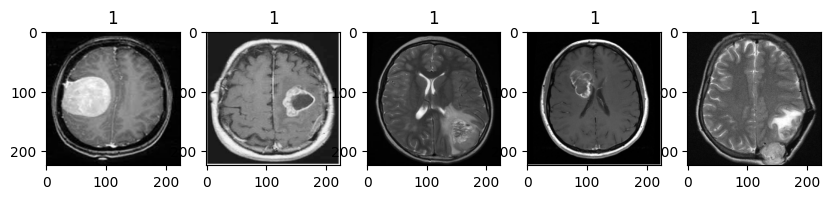

In [13]:
fig = plt.figure(figsize = (10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X[i])
    plt.title(y[i])
plt.show()

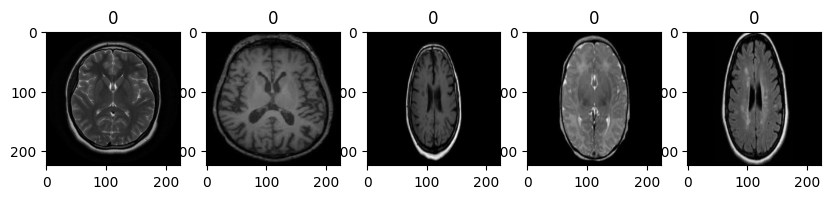

In [19]:
fig = plt.figure(figsize = (10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X[i+155])
    plt.title(y[i+155])
plt.show()

# PREPROCESSING TRAINING

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
import numpy as np
# convert to numpy array
X_train = np.array(X_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
y_train = np.array(y_train)

In [26]:
#Rescale X
X_train = X_train / 255.0
X_test = X_test / 255.0

## BUILD MODEL (BASED ON VGG19)

In [28]:
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19 

In [29]:
#visualize layer of VGG19
vgg19_model = VGG19()
vgg19_model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 143,667,240 (548.05 MB)

 Trainable params: 143,667,240 (548.05 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [33]:
# Tải mô hình VGG19 mà không có lớp phân loại cuối -  DELETE FLATTEN - FC1 - FC2 - PREDICTIONS
base_model = VGG19(weights='imagenet', 
                   include_top=False, 
                   input_shape=(224, 224, 3))


# Không train lại các lớp model 
for i in base_model.layers:
    i.trainable = False
# Tạo lại các lớp cuối cho model - do đây là phân loại nhị phân ==> activaiotn = 'sigmoid'

x = base_model.output
x = Flatten()(x)
x = Dense(512, activation = 'relu')(x)
x = Dense(1, activation = 'sigmoid')(x)

In [34]:
#Tạo mnodel 
model = Model(inputs = base_model.input, outputs = x)
model.compile(optimizer = Adam(), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [35]:
#Tăng hiệu quả của dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,        # Quay ảnh ngẫu nhiên trong phạm vi 20 độ
    width_shift_range=0.2,    # Dịch chuyển ảnh theo chiều ngang với tỷ lệ 20%
    height_shift_range=0.2,   # Dịch chuyển ảnh theo chiều dọc với tỷ lệ 20%
    horizontal_flip=True      # Lật ảnh ngang ngẫu nhiên
)

In [36]:
#fit data
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test), epochs=10)

Epoch 1/10


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 32s 4s/step - accuracy: 0.4644 - loss: 5.5885 - val_accuracy: 0.5246 - val_loss: 1.6876
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.5962 - loss: 1.2181 - val_accuracy: 0.8361 - val_loss: 0.4121
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.7022 - loss: 0.6143 - val_accuracy: 0.8361 - val_loss: 0.3945
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.7321 - loss: 0.6147 - val_accuracy: 0.7049 - val_loss: 0.6544
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.7864 - loss: 0.4805 - val_accuracy: 0.8197 - val_loss: 0.4236
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.7873 - loss: 0.5040 - val_accuracy: 0.8361 - val_loss: 0.3961
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.8049 - loss: 0.4524 - val_accuracy: 0.8525 - val_loss: 0.3402
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.8214 - loss: 0.3380 - val_accuracy: 0.8852 - val_loss: 0.3256
Epoch 9/10
8/8 ━━━━

In [37]:
# Đánh giá mô hình trên tập test
score = model.evaluate(X_test, y_test)
print(f"Test Loss: {score[0]}")
print(f"Test Accuracy: {score[1]}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.9141 - loss: 0.2767
Test Loss: 0.2658136487007141
Test Accuracy: 0.9180327653884888
